In [1]:
# Importing Libraries
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix

import nltk
from nltk import word_tokenize
from nltk.util import ngrams  
import collections
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))


In [2]:
# Traning
train1 = pd.read_csv("./hash_pre_lemm.csv")
train2 = pd.read_csv("./hash_pre.csv")
train3 = pd.read_csv("./pre.csv")
# Validation
val1 = pd.read_csv("./val_hash_pre_lemm.csv")
val2 = pd.read_csv("./val_hash_pre.csv")
val3 = pd.read_csv("./val_pre.csv")

In [3]:
def prediction(X_train, X_test, y_train, y_test, val_X, val_y):
    prediction_accuracy = {}
    
    # Multinomial Naive Bayes Classifier
    _naive_bayes = MultinomialNB()
    _naive_bayes.fit(X_train, y_train)
    _naive_bayes_prediction = _naive_bayes.predict(X_test)
    prediction_accuracy['Multinomial Naive Bayes'] = round(accuracy_score(_naive_bayes_prediction, y_test)*100, 2)
    val_naive_bayes_prediction = _naive_bayes.predict(val_X)
    prediction_accuracy['Val_Multinomial Naive Bayes'] = round(accuracy_score(val_naive_bayes_prediction, val_y)*100, 2)
    
    
    # Logistic Regression Classifier
    _LogisticRegression = LogisticRegression(multi_class='ovr', solver='liblinear')
    _LogisticRegression.fit(X_train, y_train)
    _LogisticRegression_prediction = _LogisticRegression.predict(X_test)
    prediction_accuracy['Logistic Regression'] = round(accuracy_score(_LogisticRegression_prediction, y_test)*100, 2)
    val_LogisticRegression_prediction = _LogisticRegression.predict(val_X)
    prediction_accuracy['Val_Logistic Regression'] = round(accuracy_score(val_LogisticRegression_prediction, val_y)*100, 2)
    
    # Random Forest Classifier
    _RandomForestClassifier = RandomForestClassifier(n_estimators = 1000, min_samples_split = 15, random_state = 42)
    _RandomForestClassifier.fit(X_train, y_train)
    _RandomForestClassifier_prediction = _RandomForestClassifier.predict(X_test)
    prediction_accuracy['Random Forest'] = round(accuracy_score(_RandomForestClassifier_prediction, y_test)*100, 2)
    val_RandomForestClassifier_prediction = _RandomForestClassifier.predict(val_X)
    prediction_accuracy['Val_Random Forest'] = round(accuracy_score(val_RandomForestClassifier_prediction, val_y)*100, 2)
    
    # Support Vector Machine
    _SVC = SVC(C = 0.4, kernel = 'linear', gamma='auto')
    _SVC.fit(X_train, y_train)
    _SVC_prediction = _SVC.predict(X_test)
    prediction_accuracy['Support Vector Machine'] = round(accuracy_score(_SVC_prediction, y_test)*100, 2)
    val_SVC_prediction = _SVC.predict(val_X)
    prediction_accuracy['Val_Support Vector Machine'] = round(accuracy_score(val_SVC_prediction, val_y)*100, 2)
    
    #accuracy DataFram
    prediction_accuracy_df = pd.DataFrame(prediction_accuracy.items(), columns=['Classifier', 'Accuracy'], index=None)
    return prediction_accuracy_df

In [4]:
def simple_stopwatch_approach(X, y, val_X, val_y):
    # Label encoding the classes
#     encoder = LabelEncoder()
#     y = encoder.fit_transform(y)
#     val_y = encoder.fit_transform(val_y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
    # Creating the vectorizer
    tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=1000, min_df=20, stop_words= STOPWORDS )
    X_train = tfidf.fit_transform(X_train).toarray()
    X_test = tfidf.transform(X_test).toarray()
    val_X = tfidf.transform(val_X).toarray()
    return X_train, X_test, y_train, y_test, val_X, val_y

In [24]:
flairs = ['real', 'fake']

# Taking Title, body and comments to create custom vocablary
top1 = 2000
top2 = 2000
top3 = 2000
custom_vocab = []

all_text = ' '.join(str(word) for word in train2.tweet) 
tokens = word_tokenize(all_text)

unigrams = ngrams(tokens, 1)
unigrams = collections.Counter(unigrams)
unigrams = unigrams.most_common(top1)
for i in range(top1):
    custom_vocab.append(unigrams[i][0][0])

bigrams = ngrams(tokens, 2)
bigrams = collections.Counter(bigrams)
bigrams = bigrams.most_common(top2)
for i in range(top2):
    custom_vocab.append(bigrams[i][0][0]+' '+bigrams[i][0][1])
    
# trigrams = ngrams(tokens, 3)
# trigrams = collections.Counter(trigrams)
# trigrams = trigrams.most_common(top3)
# for i in range(top2):
#     custom_vocab.append(trigrams[i][0][0]+' '+trigrams[i][0][1])

custom_vocab = list(set(custom_vocab))
custom_vocab = [word for word in custom_vocab if word not in STOPWORDS]

# Creating TF-IDF Vectorizer using custom custom_vocab

tfidf = TfidfVectorizer(vocabulary = custom_vocab)

# Saving in pickel file to use it in WebApp
# with open("ngrams_vectorizer.pkl", 'wb') as file:  
#     pickle.dump(tfidf, file)
    
def custom_approach(X, y, val_X, val_y):
    # Label encoding the classes
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)
    val_y = encoder.fit_transform(val_y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

    X_train = tfidf.fit_transform(X_train).toarray()
    X_test = tfidf.transform(X_test).toarray()
    val_X = tfidf.transform(val_X).toarray()
    return X_train, X_test, y_train, y_test, val_X, val_y

In [25]:
def accuracy_plot(a, b, title):
    fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(14,3))
    fig.suptitle(title)
    ax1.barh(np.arange(len(list(a.Classifier))), list(a.Accuracy), color='#26a69a', height=0.9)
    for i in list(a.Accuracy):
        ax1.text(i + 1, list(a.Accuracy).index(i) , i,fontsize=12)
    ax1.set_title( "NLKT stopwatch vocabulary")
    ax1.set_yticks(np.arange(len(list(a.Classifier))))
    ax1.set_yticklabels(list(a.Classifier))
    ax1.set_xlim((0, 100))
    ax1.set_xlabel("Accuracy %", fontsize=15)
    ax1.grid(False)
    ax1.set_ylabel("Models", fontsize=15)
    
    ax2.set_title( "Custom vocabulary ")
    ax2.barh(np.arange(len(list(b.Classifier))), list(b.Accuracy), color='#26a69a', height=0.9)
    for j in list(b.Accuracy):
        ax2.text(j + 1, list(b.Accuracy).index(j) , j,fontsize=12)
    ax2.set_xlim((0, 100))
    ax2.set_yticks([])
    ax2.set_xlabel("Accuracy %", fontsize=15)
    ax2.grid(False)

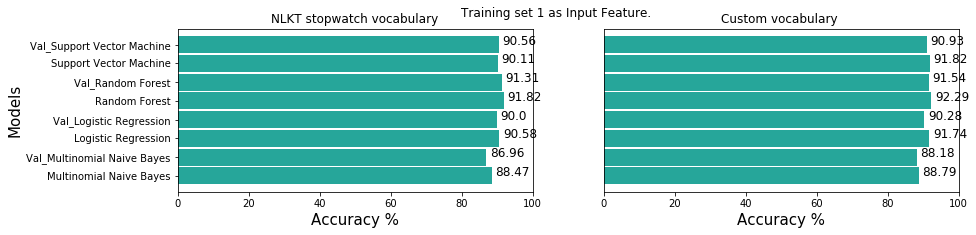

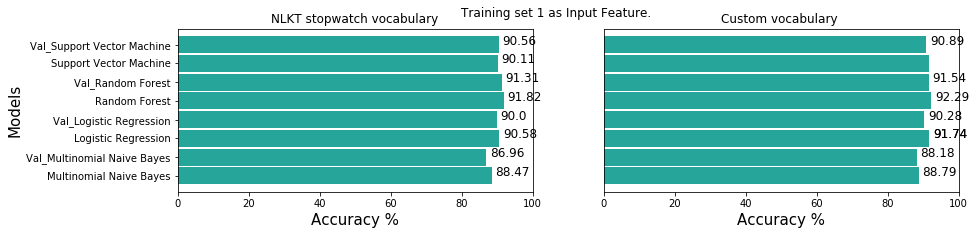

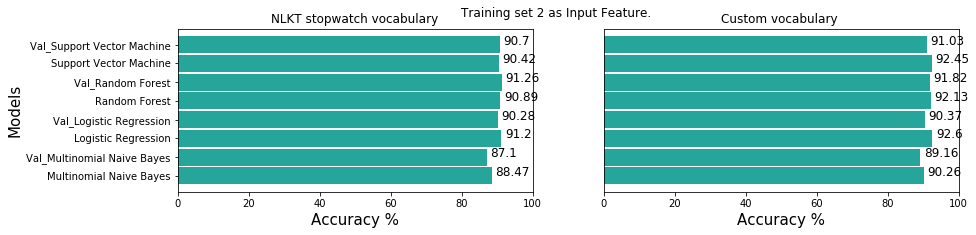

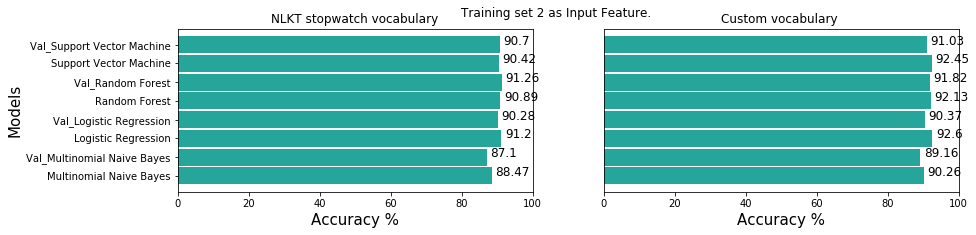

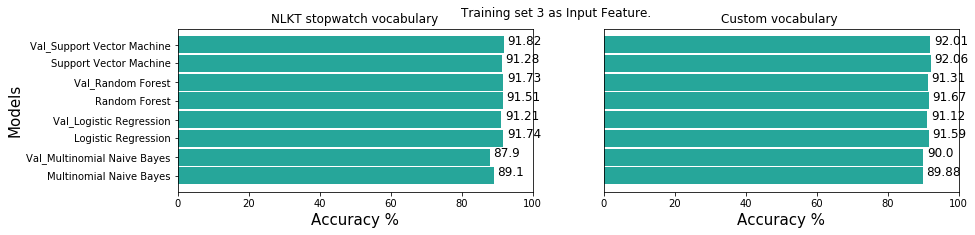

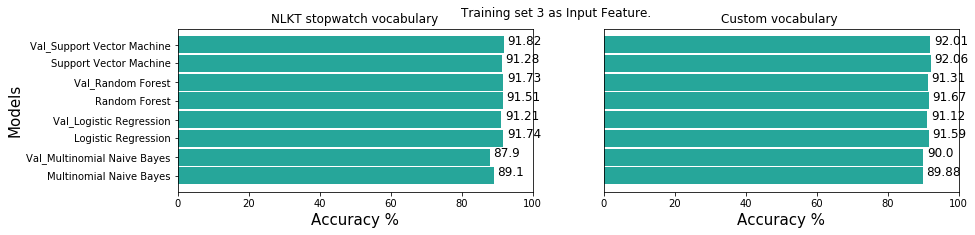

In [26]:
classes = ['fake', 'real']
title_list = ['Training set 1', 'Training set 2', 'Training set 3']
train_list = [train1, train2, train3]
val_list = [val1, val2, val3]
# NLKT stopwatch vocabulary Approach.
for i in range(3):
    for c in classes:
        X_train, X_test, y_train, y_test,val_X, val_y = simple_stopwatch_approach(train_list[i].tweet ,train_list[i][c] , val_list[i].tweet , val_list[i][c] )
        p_df = prediction(X_train, X_test, y_train, y_test, val_X, val_y) # Returns DataFrame
        # Custom vocabulary Approach.
        X_train, X_test, y_train, y_test,val_X, val_y = custom_approach(train_list[i].tweet , train_list[i][c], val_list[i].tweet , val_list[i][c] )
        pp_df = prediction(X_train, X_test, y_train, y_test, val_X, val_y) # Returns DataFrame

        # Calling accuracy_plot function to get plots
        accuracy_plot(p_df, pp_df, "{} as Input Feature.\n".format(title_list[i]))

In [89]:
X_train, X_test, y_train, y_test,val_X, val_y = simple_stopwatch_approach(train2.tweet , train2.label, val2.tweet , val2.label )
# Random Forest Classifier
_RandomForestClassifier = RandomForestClassifier(n_estimators = 1000, min_samples_split = 15, random_state = 42)
_RandomForestClassifier.fit(X_train, y_train)
_RandomForestClassifier_prediction = _RandomForestClassifier.predict(X_test)
val_RandomForestClassifier_prediction = _RandomForestClassifier.predict(val_X)
print("Accuracy => ", round(accuracy_score(_RandomForestClassifier_prediction, y_test)*100, 2))
print("\nRandom Forest Classifier results: \n")
print(classification_report(y_test, _RandomForestClassifier_prediction, target_names = ['real', 'fake']))
print("Validation Accuracy => ", round(accuracy_score(val_RandomForestClassifier_prediction, val_y)*100, 2))
print("\nValidation Random Forest Classifier results: \n")
print(classification_report(val_y, val_RandomForestClassifier_prediction, target_names = ['real', 'fake']))

Accuracy =>  90.89

Random Forest Classifier results: 

              precision    recall  f1-score   support

        real       0.90      0.90      0.90       596
        fake       0.91      0.92      0.92       688

    accuracy                           0.91      1284
   macro avg       0.91      0.91      0.91      1284
weighted avg       0.91      0.91      0.91      1284

Validation Accuracy =>  91.26

Validation Random Forest Classifier results: 

              precision    recall  f1-score   support

        real       0.92      0.89      0.91      1020
        fake       0.91      0.93      0.92      1120

    accuracy                           0.91      2140
   macro avg       0.91      0.91      0.91      2140
weighted avg       0.91      0.91      0.91      2140



In [90]:
X_train, X_test, y_train, y_test,val_X, val_y = custom_approach(train2.tweet , train2.label, val2.tweet , val2.label )
# Random Forest Classifier
_RandomForestClassifier = RandomForestClassifier(n_estimators = 1000, min_samples_split = 15, random_state = 42)
_RandomForestClassifier.fit(X_train, y_train)
_RandomForestClassifier_prediction = _RandomForestClassifier.predict(X_test)
val_RandomForestClassifier_prediction = _RandomForestClassifier.predict(val_X)
print("Accuracy => ", round(accuracy_score(_RandomForestClassifier_prediction, y_test)*100, 2))
print("\nRandom Forest Classifier results: \n")
print(classification_report(y_test, _RandomForestClassifier_prediction, target_names = ['real', 'fake']))
print("Validation Accuracy => ", round(accuracy_score(val_RandomForestClassifier_prediction, val_y)*100, 2))
print("\nValidation Random Forest Classifier results: \n")
print(classification_report(val_y, val_RandomForestClassifier_prediction, target_names = ['real', 'fake']))

Accuracy =>  92.76

Random Forest Classifier results: 

              precision    recall  f1-score   support

        real       0.93      0.92      0.92       596
        fake       0.93      0.94      0.93       688

    accuracy                           0.93      1284
   macro avg       0.93      0.93      0.93      1284
weighted avg       0.93      0.93      0.93      1284

Validation Accuracy =>  91.64

Validation Random Forest Classifier results: 

              precision    recall  f1-score   support

        real       0.93      0.90      0.91      1020
        fake       0.91      0.93      0.92      1120

    accuracy                           0.92      2140
   macro avg       0.92      0.92      0.92      2140
weighted avg       0.92      0.92      0.92      2140



In [18]:
from sklearn.datasets import load_iris